In [12]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt

### PHQ-9: Patient Health Questionnair
**Survey**: https://www.mdcalc.com/phq-9-patient-health-questionnaire-9
**Question**: Over the last 2 weeks, how often have you been bothered by any of the following problems?<br>
**Last Question**: If any of the above were scored more than “Not at all”: How difficult have these problems made it for you to do your work, take care of things at home, or get along with other people? Optional; not included in final score but may help assess global impairment.<br>
**Scoring**: 

In [13]:
PHQ9 = pd.read_csv('/Users/Mengying/Desktop/DataMining/Project/dataset/dataset/survey/PHQ-9.csv')

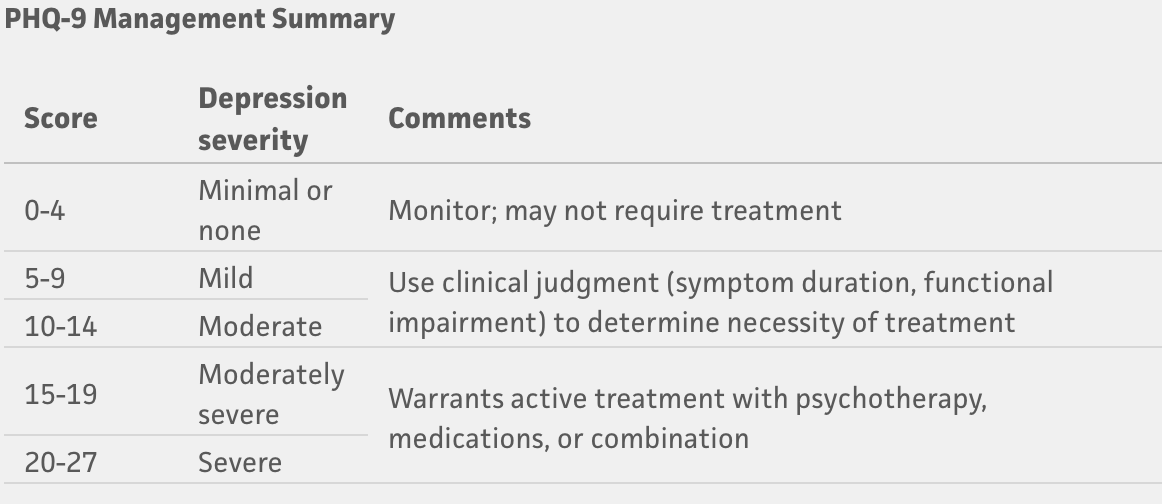

In [24]:
Image("/Users/Mengying/Desktop/DataMining/Project/dataset/dataset/survey/scoring/PHQ9_scoring.png")

In [14]:
PHQ9.columns = ['uid','type','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Response']

In [15]:
# convert raw text to score
raw2score = {'Not at all': 0, 'Several days': 1, 'More than half the days': 2, 'Nearly every day':3}    
question_cols = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9']
for q in question_cols:
    PHQ9[q] = PHQ9[q].apply(lambda x:raw2score.get(x))


In [16]:
# add up final score
PHQ9['final_score'] = PHQ9[question_cols].apply(np.sum, axis=1)

In [17]:
def score2judge(x):
    if x <=4:
        return 'minimal'
    elif x <= 9:
        return 'mild'
    elif x <= 14:
        return 'moderate'
    elif x <= 19:
        return 'moderately_severe'
    else:
        return 'severe'
PHQ9['depression_level'] = PHQ9['final_score'].apply(lambda x: score2judge(x))

In [18]:
pre_final = PHQ9[PHQ9.type == 'pre'][['uid','final_score']]

In [19]:
post_final = PHQ9[PHQ9.type == 'post'][['uid','final_score']]

In [20]:
pre_post_merge = pd.merge(pd.DataFrame(pre_final), pd.DataFrame(post_final), how='inner',on='uid')
pre_post_merge.head(5) # 38 records

,uid,final_score_x,final_score_y
0,u00,2,3
1,u01,5,4
2,u02,13,5
3,u03,2,4
4,u04,6,8


In [53]:
np.corrcoef(pre_post_merge.final_score_x, pre_post_merge.final_score_y) # 0.79

array([[ 1.        ,  0.79412367],
       [ 0.79412367,  1.        ]])

In [58]:
pre_final.shape # 46
post_final.shape # 38

(38, 2)

In [54]:
PHQ9

,uid,type,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Response,final_score,depression_level
0,u00,pre,0,1,0,1,0,0,0,0,0,Not difficult at all,2,minimal
1,u01,pre,1,1,1,1,0,1,0,0,0,Very difficult,5,mild
2,u02,pre,2,1,2,2,2,1,1,2,0,Somewhat difficult,13,moderate
3,u03,pre,0,1,0,0,0,0,0,1,0,Somewhat difficult,2,minimal
4,u04,pre,1,1,0,1,1,1,1,0,0,Somewhat difficult,6,mild
5,u05,pre,0,0,1,0,1,0,0,0,0,NaN,2,minimal
6,u07,pre,1,1,0,1,2,1,1,0,0,Not difficult at all,7,mild
7,u08,pre,1,1,0,0,1,1,1,0,0,Not difficult at all,5,mild
8,u09,pre,0,0,1,1,1,0,1,0,0,Not difficult at all,4,minimal
9,u10,pre,0,0,0,0,0,0,0,0,0,NaN,0,minimal


In [55]:
PHQ9.to_csv('/Users/Mengying/Desktop/DataMining/Project/dataset/dataset/survey/cleaned/PHQ9cleaned.csv', index=False)

In [21]:
pre_post_merge.to_csv('/Users/Mengying/Desktop/DataMining/Project/dataset/dataset/survey/cleaned/PHQ9overall.csv', index=False)

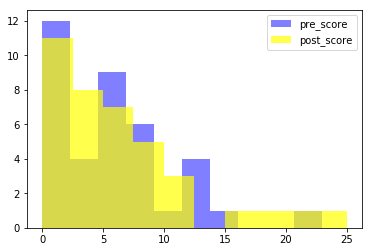

In [56]:
plt.hist(x=pre_post_merge.final_score_x, facecolor='blue', alpha=0.5, label='pre_score')
plt.hist(x=pre_post_merge.final_score_y, facecolor='yellow', alpha=0.7, label='post_score')
plt.legend(loc='upper right')
plt.show()

### PerceivedStressScale
**Survey**: https://das.nh.gov/wellness/docs/percieved%20stress%20scale.pdf <br>
**Question**: The questions in this scale ask you about your feelings and thoughts during **the last month**. In each case, please indicate with a check how often you felt or thought a certain way.<br>
**Scoring**: Individual scores on the PSS can range from 0 to 40 with higher scores indicating higher perceived
stress. <br>
► Scores ranging from 0-13 would be considered low stress. <br>
► Scores ranging from 14-26 would be considered moderate stress. <br>
► Scores ranging from 27-40 would be considered high perceived stress.

In [22]:
PSS = pd.read_csv("/Users/Mengying/Desktop/DataMining/Project/dataset/dataset/survey/PerceivedStressScale.csv")

In [94]:
PSS.head()

,uid,type,"1. In the last month, how often have you been upset because of something that happened unexpectedly?","2. In the last month, how often have you felt that you were unable to control the important things in your life?","3. In the last month, how often have you felt nervous and ""stressed""?","4. In the last month, how often have you felt confident about your ability to handle your personal problems?","5. In the last month, how often have you felt that things were going your way?","6. In the last month, how often have you found that you could not cope with all the things that you had to do?","7. In the last month, how often have you been able to control irritations in your life?","8. In the last month, how often have you felt that you were on top of things?","9. In the last month, how often have you been angered because of things that were outside of your control?","10. In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?"
0,u00,pre,Sometime,Sometime,Fairly often,Fairly often,Sometime,Very often,Sometime,Sometime,Fairly often,Fairly often
1,u01,pre,Sometime,Sometime,Sometime,Sometime,Fairly often,Sometime,Fairly often,Fairly often,Almost never,Almost never
2,u02,pre,Fairly often,Sometime,Sometime,Fairly often,Almost never,Sometime,Almost never,Sometime,Sometime,Almost never
3,u03,pre,Sometime,Almost never,Sometime,Almost never,Sometime,Never,Almost never,Never,Never,Never
4,u04,pre,Almost never,Almost never,Fairly often,Sometime,Sometime,Fairly often,Sometime,Almost never,Sometime,Sometime


In [23]:
PSS.columns = ['uid','type','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']

In [110]:
PSS.Q1.unique()

array(['Sometime', 'Fairly often', 'Almost never', 'Very often', 'Never'], dtype=object)

In [24]:
# convert raw text to score
all_question_cols = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']
reverse = {3,4,6,7} # Q4,5,7,8

question_cols = [all_question_cols[i] for i in range(10) if i not in reverse]
raw2score = {'Never': 0, 'Almost never': 1, 'Sometime': 2, 'Fairly often':3, 'Very often':4}    

reverse_question_cols = [all_question_cols[i] for i in reverse]
reverse_raw2score= {'Never': 4, 'Almost never': 3, 'Sometime': 2, 'Fairly often':1, 'Very often':0}    

for q in question_cols:
    PSS[q] = PSS[q].apply(lambda x:raw2score.get(x,float('NaN')))
for q in reverse_question_cols:
    PSS[q] = PSS[q].apply(lambda x:reverse_raw2score.get(x, float('NaN')))   

In [129]:
PSS.Q3.unique()

array([  3.,   2.,   1.,   4.,  nan])

In [130]:
# Cleaning null values
PSS.isnull().sum()

uid     0
type    0
Q1      0
Q2      0
Q3      1
Q4      0
Q5      1
Q6      0
Q7      0
Q8      0
Q9      0
Q10     0
dtype: int64

In [132]:
print(PSS[PSS["Q5"].isnull()])

    uid type  Q1  Q2   Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10
33  u45  pre   2   3  2.0   3 NaN   1   4   2   3    1


In [134]:
print(PSS[PSS["Q3"].isnull()])

    uid type  Q1  Q2  Q3  Q4   Q5  Q6  Q7  Q8  Q9  Q10
24  u31  pre   4   4 NaN   3  2.0   1   1   3   2    2


In [25]:
# only two records, let's impute using mean across question type
PSS.loc[33,'Q5'] = (3+4+2)/3
PSS.loc[24,'Q3'] = (4+4+1+2+2)/5

In [26]:
# add up final score
PSS['final_score'] = PSS[all_question_cols].apply(np.sum, axis=1)

In [27]:
def score2judge(x):
    if x <=13:
        return 'low'
    elif x <= 26:
        return 'moderate'
    else:
        return 'high'
PSS['depression_level'] = PSS['final_score'].apply(lambda x: score2judge(x))

In [28]:
PSS.head()

,uid,type,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,final_score,depression_level
0,u00,pre,2,2,3.0,1,2.0,4,2,2,3,3,24.0,moderate
1,u01,pre,2,2,2.0,2,1.0,2,1,1,1,1,15.0,moderate
2,u02,pre,3,2,2.0,1,3.0,2,3,2,2,1,21.0,moderate
3,u03,pre,2,1,2.0,3,2.0,0,3,4,0,0,17.0,moderate
4,u04,pre,1,1,3.0,2,2.0,3,2,3,2,2,21.0,moderate


In [139]:
PSS.to_csv('/Users/Mengying/Desktop/DataMining/Project/dataset/dataset/survey/cleaned/PSScleaned.csv', index=False)

In [29]:
# Correlation 
pre_final = PSS[PSS.type == 'pre'][['uid','final_score']]
post_final =  PSS[ PSS.type == 'post'][['uid','final_score']]
pre_post_merge = pd.merge(pd.DataFrame(pre_final), pd.DataFrame(post_final), how='inner',on='uid')

In [31]:
pre_post_merge.to_csv('/Users/Mengying/Desktop/DataMining/Project/dataset/dataset/survey/cleaned/PSSoverall.csv', index=False)

In [30]:
np.corrcoef(pre_post_merge.final_score_x, pre_post_merge.final_score_y)

array([[ 1.        ,  0.63322047],
       [ 0.63322047,  1.        ]])

In [141]:
print(pre_final.shape)
print(post_final.shape)

(46, 2)
(39, 2)


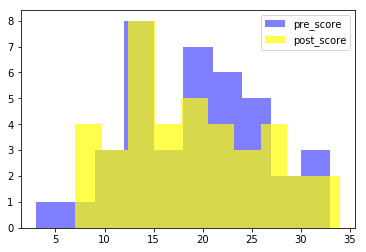

In [142]:
plt.hist(x=pre_post_merge.final_score_x, facecolor='blue', alpha=0.5, label='pre_score')
plt.hist(x=pre_post_merge.final_score_y, facecolor='yellow', alpha=0.7, label='post_score')
plt.legend(loc='upper right')
plt.show()

### PSQI: Pittsburgh Sleep Quality Index
**Survey**: http://uacc.arizona.edu/sites/default/files/psqi_sleep_questionnaire_1_pg.pdf <br>
**Question**: The questions in this scale ask you about your sleep quality during **the last month**.<br>
**Q5**:During the past month, how often have you had trouble sleeping because you ...<br>
**Scoring**: 
► Scores ranging >= 5 would be considered poor sleep qualilty. <br>

In [53]:
PSQI = pd.read_csv("/Users/Mengying/Desktop/DataMining/Project/dataset/dataset/survey/psqi.csv")

In [145]:
PSQI.head()

,uid,type,"During the past month, what time have you usually gone to bed at night?","During the past month, how long (in minutes) has it usually taken you to fall asleep each night?",When have you usually gotten up in the morning?,"During the past month, how many hours of actual sleep did you get at night? (This may be different than the number of hours you spent in bed.)",a. Cannot get to sleep within 30 minutes,b. Wake up in the middle of the night or early morning,c. Have to get up to use the bathroom,d. Cannot breathe comfortably,...,f. Feel too cold,g. Feel too hot,h. Have bad dreams,i. Have pain,j. Other reason(s),"Other reason(s), please describe, including how often you have had trouble sleeping because of this reason(s):","During the past month, how often have you taken medicine (prescribed or over the counter) to help you sleep?","During the past month, how often have you had trouble staying awake while driving, eating meals, or engaging in social activity?","During the past month, how much of a problem has it been for you to keep up enthusiasm to get things done?","During the past month, how would you rate your sleep quality overall?"
0,u00,pre,2:00 AM,10 mins,7:00 AM,6 hours,Not during the past month,Three or a more times week,Three or a more times week,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Once or a twice week,headaches,Not during the past month,Not during the past month,Once or a twice week,Fairly bad
1,u01,pre,1AM,20,11AM,10-Sep,Not during the past month,Three or a more times week,Not during the past month,Not during the past month,...,Once or a twice week,Once or a twice week,Less than once week,Not during the past month,Not during the past month,NaN,Less than once week,Once or a twice week,Once or a twice week,Very good
2,u02,pre,around 1 am,"I fall asleep really quickly, maybe 5-10minutes",about 9am,about 7-8hours,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
3,u03,pre,1am,10min,8:30am,7hours,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Less than once week,Fairly good
4,u04,pre,11:30,10,6:00,6:00,Not during the past month,Less than once week,Less than once week,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Once or a twice week,Fairly good


In [54]:
colnames = ['uid','type','Q1','Q2','Q3','Q4']
for i in range(ord('a'), ord('j')+1):
    colnames.append ('Q5' + chr(i))
colnames.extend(['Q5j2','Q6','Q7','Q8','Q9'])
PSQI.columns = colnames

In [56]:
PSQI.Q9.unique()

array(['Fairly bad', 'Very good', 'Fairly good', 'Very bad', nan], dtype=object)

In [55]:
# convert raw text to score
all_question_cols = colnames[2:]
raw_txt = {0,1,2,3,14, 18} #Q1,2,3,4,Q5j2, Q9

question_cols = [all_question_cols[i] for i in range(19) if i not in raw_txt]
raw2score = {'Not during the past month': 0, 'Less than once week': 1, 'Once or a twice week': 2, 'Three or a more times week':3}    
q9score = {'Very good': 0, 'Fairly good': 1, 'Fairly bad': 2, 'Very bad': 3}
#raw_question_cols = [all_question_cols[i] for i in raw_txt]

for q in question_cols:
    PSQI[q] = PSQI[q].apply(lambda x:raw2score.get(x,float('NaN')))

# Q9
PSQI.Q9 = PSQI.Q9.apply(lambda x:q9score.get(x,float('NaN')))

# for q in raw_question_cols:
#     PSS[q] = PSS[q].apply(lambda x:reverse_raw2score.get(x, float('NaN'))) 

In [35]:
import re

In [169]:
PSQI[['Q5j','Q5j2']] # to be cleaned

,Q5j,Q5j2
0,Once or a twice week,headaches
1,Not during the past month,NaN
2,Not during the past month,NaN
3,Not during the past month,NaN
4,Not during the past month,NaN
5,Not during the past month,NaN
6,Not during the past month,NaN
7,Not during the past month,NaN
8,Not during the past month,NaN
9,Once or a twice week,Trying to solve coding problems while in bed (...


In [177]:
# time to went to bed
PSQI.Q1.unique() # this may be subject to more insights to student's life quality

array(['2:00 AM', '1AM', 'around 1 am', '1am', '11:30', '11:30pm',
       'Between 12a and 2a', '1:00 AM', '12:00', '12-1 AM', '10pm',
       '2:00am', '1', '11 or 12pm',
       'During the beginning of the month around 4am. But now, after spring break, I try to be in bed around 12, latest 1:30am.',
       '12AM', 'Midnight', '11pm-4pm', '1 or 2 am', '13:00', '1-2AM',
       'around midnight', 'Never', '1:30 AM', '2AM', 'around 1:00 AM',
       '12:30AM', '3 or 4 am', '12:00 m', '1:30', '2-4am', '2am',
       '3:00 AM', 'Midnight or 1 AM', '0:30', '3AM', '1:00am', '5am',
       '12-1AM', '2:30am', '12', '12am',
       "5am; most nights I've not gone to bed at all since the start of May",
       '3am in the morning', '3-4am', '12am (midnight)', 'usually dawn',
       '12:00am', '2', '12:30 AM', '4:00 AM', 'midnight', '12:30', nan,
       '2-5 am', '3am'], dtype=object)

In [179]:
# time to get up
PSQI.Q3.unique() # insights

array(['7:00 AM', '11AM', 'about 9am', '8:30am', '6:00', '8:00am',
       'between 9a and 11a', '9:00 AM', '8:30', '8:10 AM', '3am', '8:45am',
       '10am', '8:15', '7:30am',
       'It varies. I know that I regularly need at least 6-7 hrs of sleep, so ideally 7-8am, but because of my late sleep time, usually around 8:30 or 9am.',
       '8am', '7am-10am', '9am to 11am', '8:00', '7:30',
       'Just hour before first class', '9:45 AM', '10AM', '8:30~9:00 AM',
       '8AM', '9 or 10 am', '8:30-9', '9:30 AM', '9:00', '9AM', '7-8am',
       '9am', '9:30am', '1:00 PM', '9:00am', '10:30am', '9 am or 10 am',
       '8:00 AM', '7am', '2pm', '11am', '830',
       "Usually I don't get up, I'm awake from the night before. But often I go to sleep at 6 and wake up at 8",
       '10', '9"00 am', '8:30 AM', '11:00 AM', nan, '8:40 AM', '10:00 AM'], dtype=object)

In [178]:
# time taken to fall asleep
PSQI.Q2.unique() # to be cleaned

array(['10 mins', '20', 'I fall asleep really quickly, maybe 5-10minutes',
       '10min', '10', '15', '20 minutes', '15 minutes', '30', '<10 mins',
       '10 minutes', '5', '5 min',
       'It has become longer and longer, right now around an hour, sometimes longer some nights.',
       'less than 20', '5minutes', '15-20min', '30  minutes', '1 hour',
       '30 mins', '45', '30 minutes', '1 minutes', '5~10 mins', '30 min',
       'in 10 min', '12', '20mins', '15min', '1 Hour', '15-20 min', '60',
       '14 minutes', '15 mins',
       "at, first, when I had to pull all-nighters, it took me at least 2 hrs. Now, because I'm overtired, I sleep immediately.",
       '5mins', '10minutes', '20-30', '5 mins', 'half a hour', '10 min',
       'less than half an hour', nan, '5-10 min', '1 hr', '15 Minutes'], dtype=object)

In [56]:
# Q2 manual clean
PSQI.loc[PSQI.Q2 == '1 hour', 'Q2'] = '60 min'
PSQI.loc[PSQI.Q2 == 'half a hour', 'Q2'] = '30 min'
PSQI.loc[PSQI.Q2 == 'It has become longer and longer, right now around an hour, sometimes longer some nights.', 'Q2'] = '60 min'
PSQI.loc[PSQI.Q2 == '1 Hour', 'Q2'] = '60 min'
PSQI.loc[PSQI.Q2 == 'at, first, when I had to pull all-nighters, it took me at least 2 hrs. Now, because I\'m overtired, I sleep immediately.', 'Q2'] = '120 min'
PSQI.loc[PSQI.Q2 == 'less than half an hour', 'Q2'] = '30 min'

In [57]:
PSQI.Q2 = PSQI['Q2'].apply(lambda x: re.search(r'\d+',str(x)).group() if re.search(r'\d+', str(x)) else float('NaN'))

In [8]:
PSQI.Q2

0      10
1      20
2       5
3      10
4      10
5      15
6      20
7      15
8      10
9      30
10     10
11     10
12     10
13      5
14      5
15     60
16     10
17     20
18      5
19     15
20     30
21     20
22     60
23     30
24     30
25     45
26     30
27      1
28      5
29     10
     ... 
54     10
55      5
56      5
57     10
58    120
59      5
60     10
61     10
62     20
63     30
64     20
65     30
66     10
67     30
68     20
69      5
70     30
71     10
72     10
73     12
74     20
75     30
76    NaN
77     15
78      5
79     10
80     30
81      1
82     10
83     15
Name: Q2, Length: 84, dtype: object

In [180]:
# hours of sleep
PSQI.Q4.unique() # to be cleaned

array(['6 hours', '10-Sep', 'about 7-8hours', '7hours', '6:00', '8',
       '7 Hours', '7.5', '8-Jul', '7', '9 hours', '7-Jun',
       'Difficult to say, because I did have a few all-nighters during finals. More than 130 hours, at least.',
       '7 hours', '8 hours', '6-May', 'Not regularly, but 3 to 5',
       '6~7hours', '7.5hrs', '5 hours', '7hours approximately', '8 Hours',
       '5-Apr', '6', '9 Hours', '200 hrs', 'Around 9 hours on average',
       '7:30', '6 to 7', '7.5-8 hours',
       "probably 2hrs per night, 4 if I'm lucky", '5', '7hours/day',
       '6:30 hours', '4-Mar', '7.5 hours', nan, '420', '8-Mar', '6~7',
       '6 hr', '8.5', '4-5 Hours'], dtype=object)

In [58]:
# Q4 manual clean
PSQI.loc[PSQI.Q4 == 'Difficult to say, because I did have a few all-nighters during finals. More than 130 hours, at least.''Q4'] = 7     

In [59]:
PSQI.Q4 = PSQI['Q4'].apply(lambda x: re.search(r'\d(\.\d)?',str(x)).group() if re.search(r'\d(\.\d)?', str(x)) else float('NaN'))
#PSQI.Q4

In [49]:
PSQI.head(5)

,uid,type,Q1,Q2,Q3,Q4,Q5a,Q5b,Q5c,Q5d,...,Q5f,Q5g,Q5h,Q5i,Q5j,Q5j2,Q6,Q7,Q8,Q9
0,u00,pre,2:00 AM,10,7:00 AM,6,0.0,3.0,3.0,0.0,...,0.0,0.0,1.0,0.0,2.0,headaches,0.0,0.0,2.0,2.0
1,u01,pre,1AM,20,11AM,1,0.0,3.0,0.0,0.0,...,2.0,2.0,1.0,0.0,0.0,NaN,1.0,2.0,2.0,0.0
2,u02,pre,around 1 am,5,about 9am,7,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,NaN,0.0,2.0,2.0,1.0
3,u03,pre,1am,10,8:30am,7,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,NaN,0.0,1.0,1.0,1.0
4,u04,pre,11:30,10,6:00,6,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,2.0,1.0


In [60]:
#PSQI.isnull().sum(axis=1)
PSQI = PSQI.fillna(0)

In [61]:
def get_final_score(row):
    comp1 = row['Q9']
    
    if int(row['Q2']) <= 15:  
        comp2 = row['Q5a']
    elif int(row['Q2']) <= 30:
        comp2 = 1 + row['Q5a']
    elif int(row['Q2']) <= 60:
        comp2 = 2 + row['Q5a']
    else:
        comp2 = 3 + row['Q5a']
    if comp2 == 0:
        comp2 = 0
    elif comp2 <= 2:
        comp2 = 1
    elif comp2 <= 4:
        comp2 = 2
    else:
        comp2 = 3
    
    if float(row['Q4']) > 7: 
        comp3 = 0
    elif float(row['Q4']) >= 6:
        comp3 = 1
    elif float(row['Q4']) >= 5:
        comp3 = 2
    else:
        comp3 = 3
    #comp4    
    comp5 = row['Q5b']+row['Q5c']+row['Q5d']+row['Q5e']+row['Q5f']+row['Q5g']+row['Q5h']+row['Q5i']+row['Q5j']
    if comp5 == 0:
        comp5 = 0
    elif comp5 <= 9:
        comp5 = 1
    elif comp5 <= 18:
        comp5 = 2
    else:
        comp5 = 3
        
    comp6 = row['Q6']
    
    comp7 = row['Q7']+row['Q8']
    if comp7 == 0:
        comp7 = 0
    elif comp7 <=2:
        comp7 = 1
    elif comp7 <=4:
        comp7 = 2
    else:
        comp7 = 3
    
    return comp1+comp2+comp3+comp5+comp6+comp7  

In [62]:
PSQI['final_score'] = PSQI.apply(lambda x:get_final_score(x), axis=1)

In [82]:
PSQI['sleep_level'] = PSQI['final_score'].apply(lambda x:'good' if x < 5 else 'poor')

In [83]:
PSQI.head(10)

,uid,type,Q1,Q2,Q3,Q4,Q5a,Q5b,Q5c,Q5d,...,Q5h,Q5i,Q5j,Q5j2,Q6,Q7,Q8,Q9,final_score,sleep_level
0,u00,pre,2:00 AM,10,7:00 AM,6,0.0,3.0,3.0,0.0,...,1.0,0.0,2.0,headaches,0.0,0.0,2.0,2.0,5.0,poor
1,u01,pre,1AM,20,11AM,1,0.0,3.0,0.0,0.0,...,1.0,0.0,0.0,0,1.0,2.0,2.0,0.0,8.0,poor
2,u02,pre,around 1 am,5,about 9am,7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,2.0,2.0,1.0,5.0,poor
3,u03,pre,1am,10,8:30am,7,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0,0.0,1.0,1.0,1.0,4.0,good
4,u04,pre,11:30,10,6:00,6,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,2.0,1.0,4.0,good
5,u05,pre,11:30pm,15,8:00am,8,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,3.0,good
6,u07,pre,Between 12a and 2a,20,between 9a and 11a,8,2.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0,0.0,2.0,2.0,1.0,6.0,poor
7,u08,pre,1:00 AM,15,9:00 AM,7,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,1.0,1.0,5.0,poor
8,u09,pre,12:00,10,8:30,7.5,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,3.0,0.0,3.0,good
9,u10,pre,12-1 AM,30,8:10 AM,8,3.0,3.0,0.0,0.0,...,2.0,0.0,2.0,Trying to solve coding problems while in bed (...,0.0,1.0,1.0,1.0,5.0,poor


In [86]:
PSQI.to_csv('/Users/Mengying/Desktop/DataMining/Project/dataset/dataset/survey/cleaned/PSQIcleaned.csv',index=False)

In [64]:
# Correlation 
pre_final = PSQI[PSQI.type == 'pre'][['uid','final_score']]
post_final =  PSQI[ PSQI.type == 'post'][['uid','final_score']]
pre_post_merge = pd.merge(pd.DataFrame(pre_final), pd.DataFrame(post_final), how='inner',on='uid')

np.corrcoef(pre_post_merge.final_score_x, pre_post_merge.final_score_y)

array([[ 1.       ,  0.6055337],
       [ 0.6055337,  1.       ]])

In [65]:
pre_post_merge.to_csv('/Users/Mengying/Desktop/DataMining/Project/dataset/dataset/survey/cleaned/PSQIoverall.csv', index=False)

In [88]:
print(pre_final.shape)
print(post_final.shape)

(46, 2)
(38, 2)


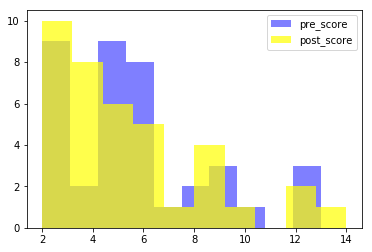

In [89]:
plt.hist(x=pre_post_merge.final_score_x, facecolor='blue', alpha=0.5, label='pre_score')
plt.hist(x=pre_post_merge.final_score_y, facecolor='yellow', alpha=0.7, label='post_score')
plt.legend(loc='upper right')
plt.show()

### vr_12
**Survey**:

In [90]:
vr12 = pd.read_csv("/Users/Mengying/Desktop/DataMining/Project/dataset/dataset/survey/vr_12.csv")

In [91]:
vr12.head()

,uid,type,"In general, would you say your health is","Moderate activities, such as moving a table, pushing a vacuum cleaner, bowling or playing golf?",Climbing several flights of stairs?,Accomplished less than you would like.,Were limited in the kind of work or other activities.,Accomplished less than you would like..1,Didn't do work or other activities as carefully as usual.,"During the past 4 weeks, how much did pain interfere with your normal work (including both work outside the home and housework)?",How much of the time during the past 4 weeks: Have you felt calm and peaceful?,How much of the time during the past 4 weeks: Did you have a lot of energy?,How much of the time during the past 4 weeks: Have you felt downhearted and blue?,"During the past 4 weeks, how much of the time has your physical health or emotional problems interfered with your social activities (like visiting with friends, relatives, etc.)?","Compared to one year ago, how would you rate your physical health in general now?","Compared to one year ago, how would you rate your emotional problems (such as feeling anxious, depressed or irritable) now?"
0,u00,pre,Very good,"No, not limited at all","No, not limited at all","No, none of the time","No, none of the time","Yes, some of the time","Yes, some of the time",Not at all,A good bit of the time,Some of the time,Some of the time,Some of the time,Slightly worse,About the same
1,u01,pre,Excellent,"No, not limited at all","No, not limited at all","No, none of the time","No, none of the time","Yes, some of the time","Yes, some of the time",Not at all,A good bit of the time,A good bit of the time,Some of the time,A little of the time,About the same,Much better
2,u02,pre,Good,"No, not limited at all","No, not limited at all","Yes, some of the time","No, none of the time","No, none of the time","Yes, a little of the time",Not at all,Most of the time,Some of the time,A little of the time,None of the time,About the same,Slightly better
3,u03,pre,Very good,"No, not limited at all","No, not limited at all","No, none of the time","No, none of the time","Yes, a little of the time","Yes, a little of the time",Not at all,A good bit of the time,A good bit of the time,Some of the time,A little of the time,Slightly better,Slightly worse
4,u04,pre,Very good,"No, not limited at all","No, not limited at all","No, none of the time","No, none of the time","Yes, a little of the time","Yes, a little of the time",Not at all,A good bit of the time,A good bit of the time,A little of the time,None of the time,Slightly better,About the same


In [93]:
vr12.columns = ['uid','type','Q1','Q2','Q3','Q4a','Q4b','Q5a','Q5b','Q6','Q7','Q8','Q9','Q10','Q11','Q12']

In [ ]:
# convert raw text to score
all_question_cols = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']
reverse = {3,4,6,7} # Q4,5,7,8

question_cols = [all_question_cols[i] for i in range(10) if i not in reverse]
raw2score = {'Never': 0, 'Almost never': 1, 'Sometime': 2, 'Fairly often':3, 'Very often':4}    

reverse_question_cols = [all_question_cols[i] for i in reverse]
reverse_raw2score= {'Never': 4, 'Almost never': 3, 'Sometime': 2, 'Fairly often':1, 'Very often':0}    

for q in question_cols:
    PSS[q] = PSS[q].apply(lambda x:raw2score.get(x,float('NaN')))
for q in reverse_question_cols:
    PSS[q] = PSS[q].apply(lambda x:reverse_raw2score.get(x, float('NaN')))  

In [94]:
vr12.isnull().sum()
#PSQI = PSQI.fillna(0)

uid     0
type    0
Q1      0
Q2      0
Q3      0
Q4a     0
Q4b     0
Q5a     0
Q5b     0
Q6      1
Q7      0
Q8      0
Q9      0
Q10     0
Q11     0
Q12     0
dtype: int64